In [135]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from Helpers import helpers
import pandas as pd
import seaborn as sns
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

In [136]:
import numpy as np


colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

## Data anlysis

In [137]:
hearth_data = pd.read_csv('./data/hearth.csv', sep=';')
numeric_column_names = ['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax']
hearth_data_numerical = hearth_data[numeric_column_names]
hearth_data_numerical['class'] = hearth_data['NSP']
hearth_data_numerical = hearth_data_numerical.convert_dtypes()
hearth_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LB      2126 non-null   Int64 
 1   AC      2126 non-null   Int64 
 2   FM      2127 non-null   Int64 
 3   UC      2127 non-null   Int64 
 4   ASTV    2127 non-null   string
 5   MSTV    2127 non-null   string
 6   ALTV    2127 non-null   string
 7   MLTV    2127 non-null   string
 8   DL      2128 non-null   Int64 
 9   DS      2128 non-null   Int64 
 10  DP      2128 non-null   Int64 
 11  DR      2128 non-null   Int64 
 12  Width   2126 non-null   Int64 
 13  Min     2126 non-null   Int64 
 14  Max     2126 non-null   Int64 
 15  Nmax    2126 non-null   Int64 
 16  class   2126 non-null   Int64 
dtypes: Int64(13), string(4)
memory usage: 309.9 KB


/tmp/ipykernel_84321/2187788410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hearth_data_numerical['class'] = hearth_data['NSP']


In [138]:
hearth_data_numerical['class']  = hearth_data_numerical['class'] - 1

In [139]:
hearth_data_numerical = hearth_data_numerical.drop(columns=['ASTV', 'MSTV', 'ALTV', 'MLTV'])
hearth_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   LB      2126 non-null   Int64
 1   AC      2126 non-null   Int64
 2   FM      2127 non-null   Int64
 3   UC      2127 non-null   Int64
 4   DL      2128 non-null   Int64
 5   DS      2128 non-null   Int64
 6   DP      2128 non-null   Int64
 7   DR      2128 non-null   Int64
 8   Width   2126 non-null   Int64
 9   Min     2126 non-null   Int64
 10  Max     2126 non-null   Int64
 11  Nmax    2126 non-null   Int64
 12  class   2126 non-null   Int64
dtypes: Int64(13)
memory usage: 243.4 KB


In [140]:
hearth_data_numerical = hearth_data_numerical.rename(columns={
    'LB': 'baseline value',
    'AC': 'accelerations',
    'FM': 'fetal_movement',
    'UC': 'uterine_contractions',
    'DL': 'light_decelerations',
    'DS': 'severe_decelerations',
    'DP': 'prolongued_decelerations',
    'DR': 'abnormal_short_term_variability',
    'Width': 'histogram_width',
    'Min': 'histogram_min',
    'Max': 'histogram_max',
    'Nmax': 'histogram_number_of_peaks',
})

In [141]:
hearth_data_numerical.dropna(inplace=True)

In [142]:
hearth_data_numerical.shape

(2126, 13)

In [143]:
hearth_data_numerical = hearth_data_numerical.astype(np.float)

/tmp/ipykernel_84321/776994095.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hearth_data_numerical = hearth_data_numerical.astype(np.float)


In [144]:
hearth_data_category_columns = ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']
#hearth_data = hearth_data.drop(hearth_data_category_columns, axis=1)

<AxesSubplot:>

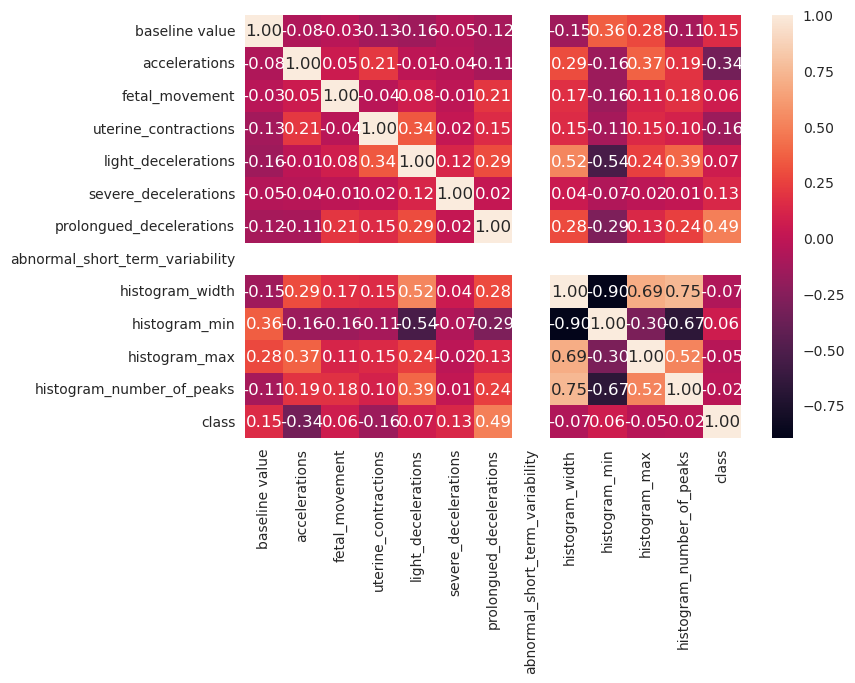

In [145]:
sns.heatmap(hearth_data_numerical.corr(), annot=True, fmt=".2f")

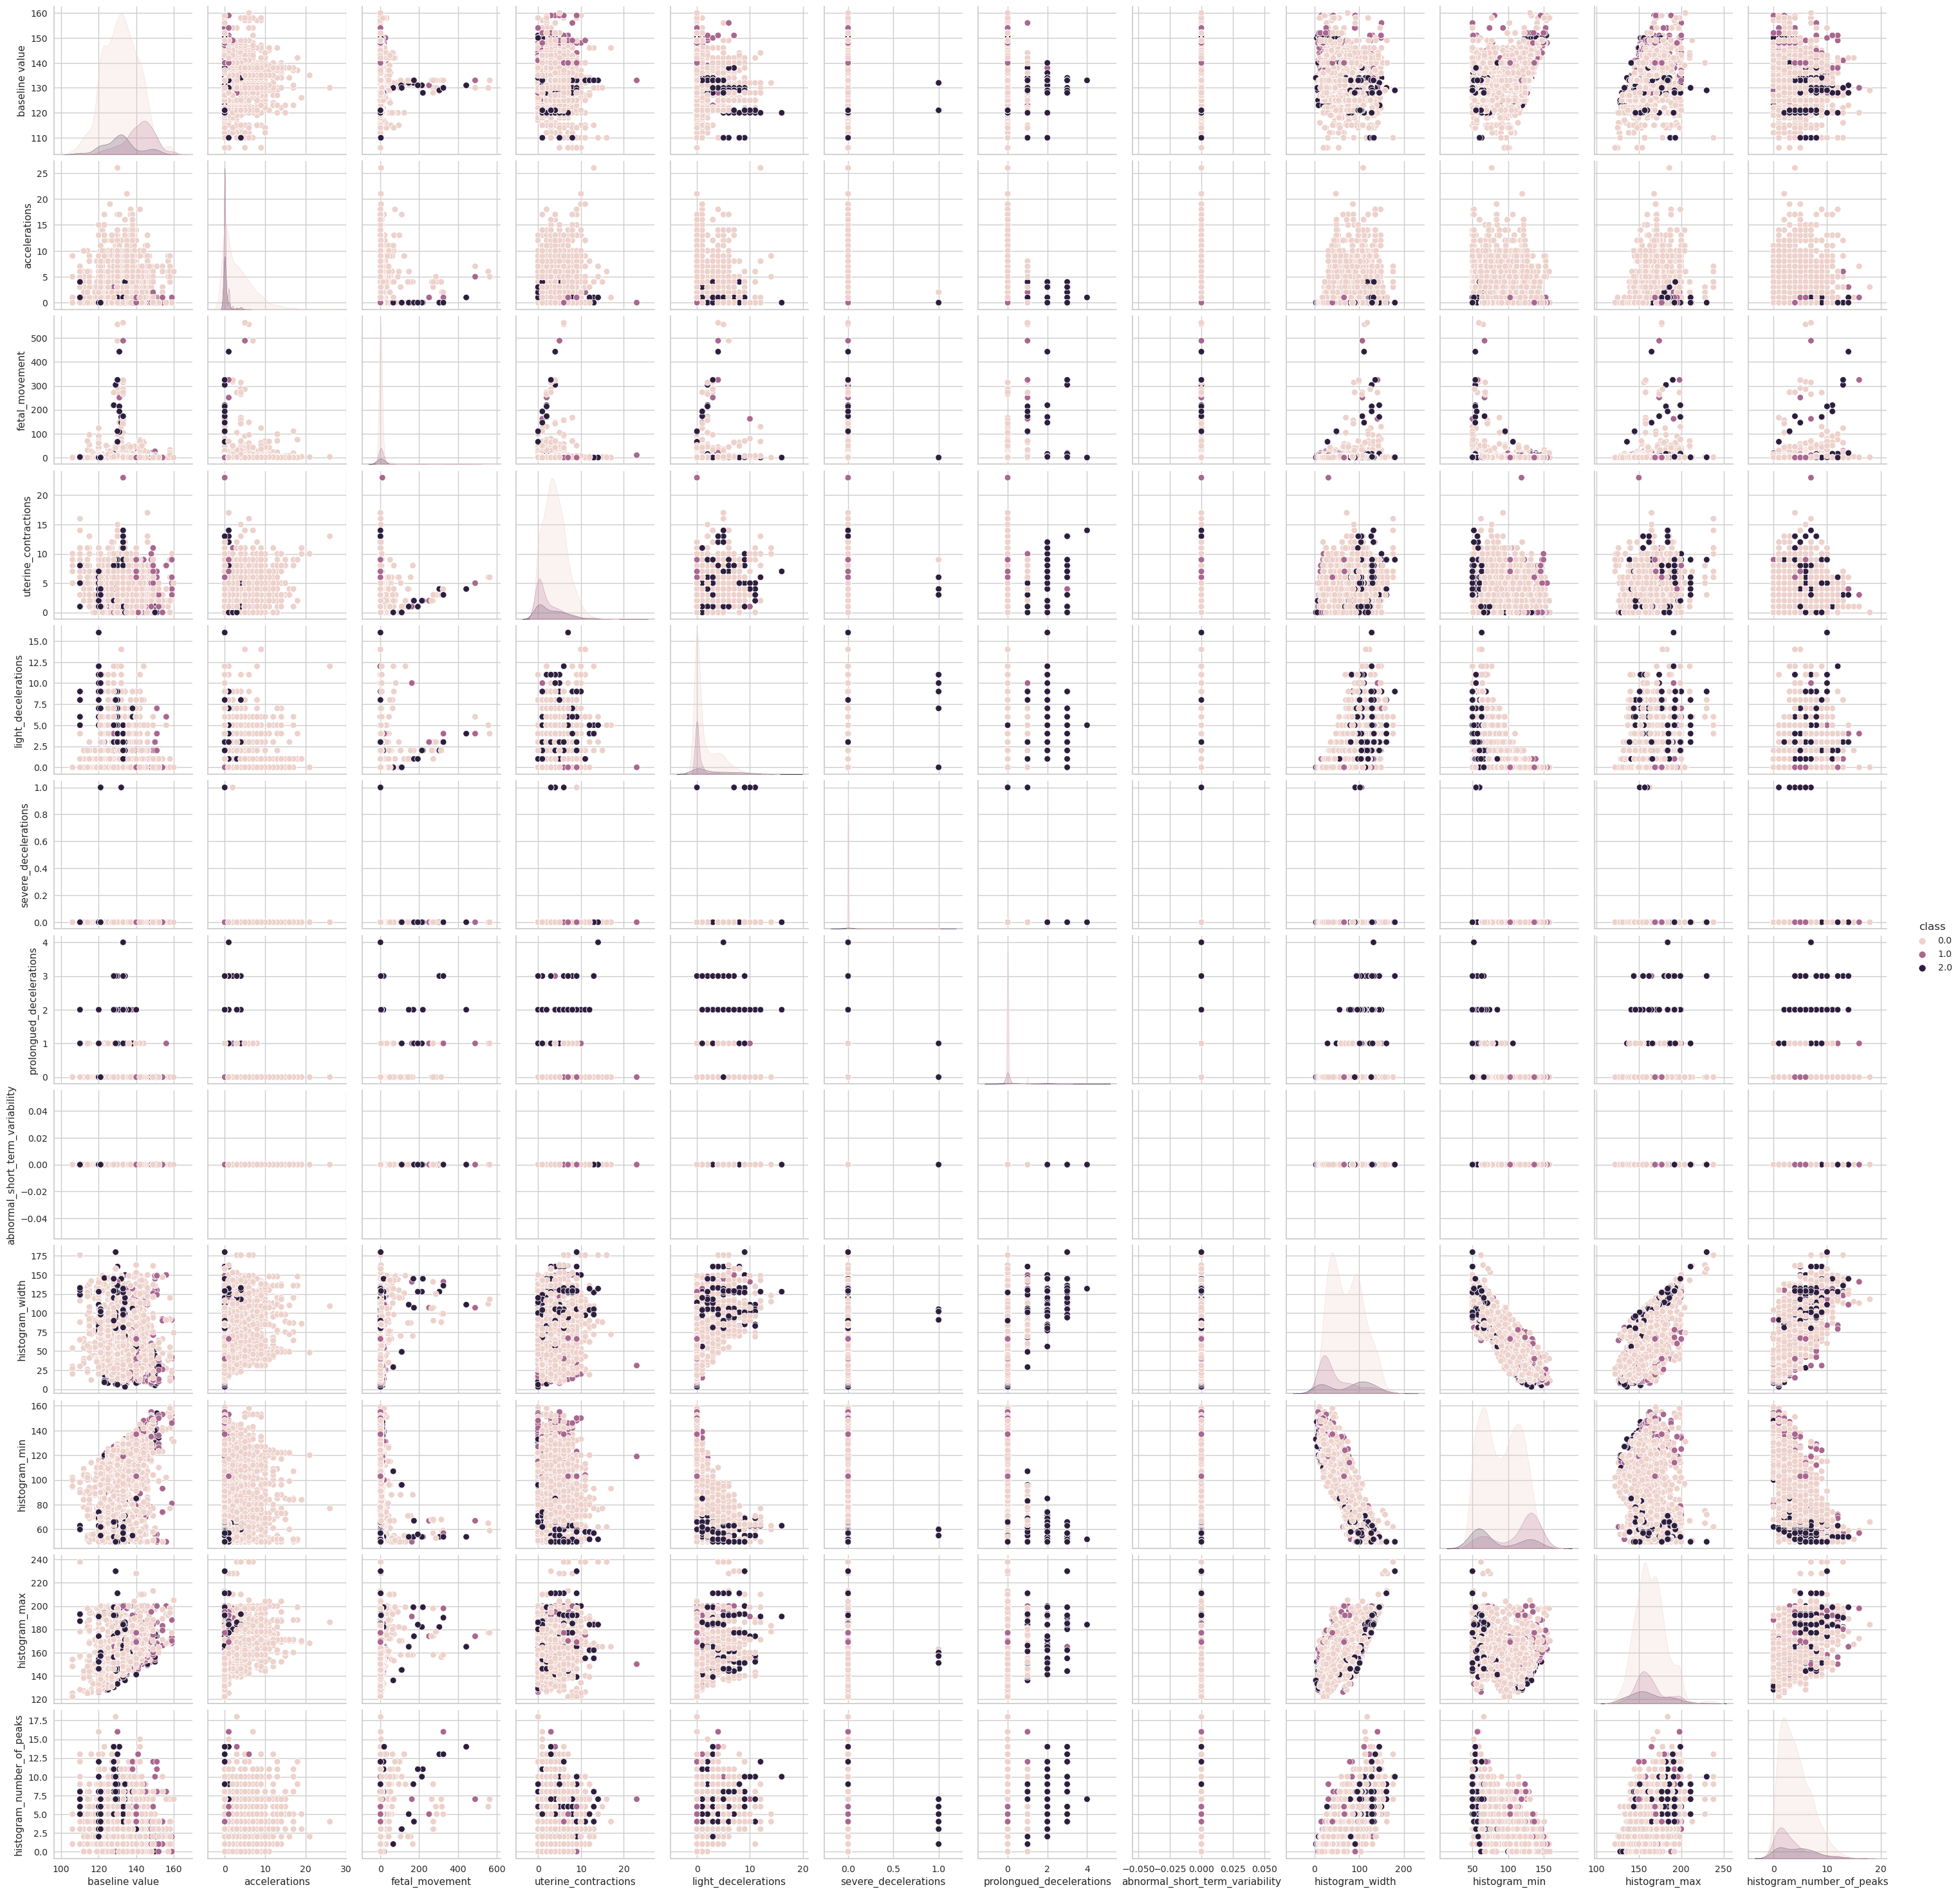

In [146]:
sns.pairplot(hearth_data_numerical, hue='class')

Due to the linearity of the data for three columns: severe_descerlations, prolongued_decelerations and abnormal_short_term_variability, we will drop them.


In [147]:
hearth_data_numerical = hearth_data_numerical.drop(columns=['severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability'])

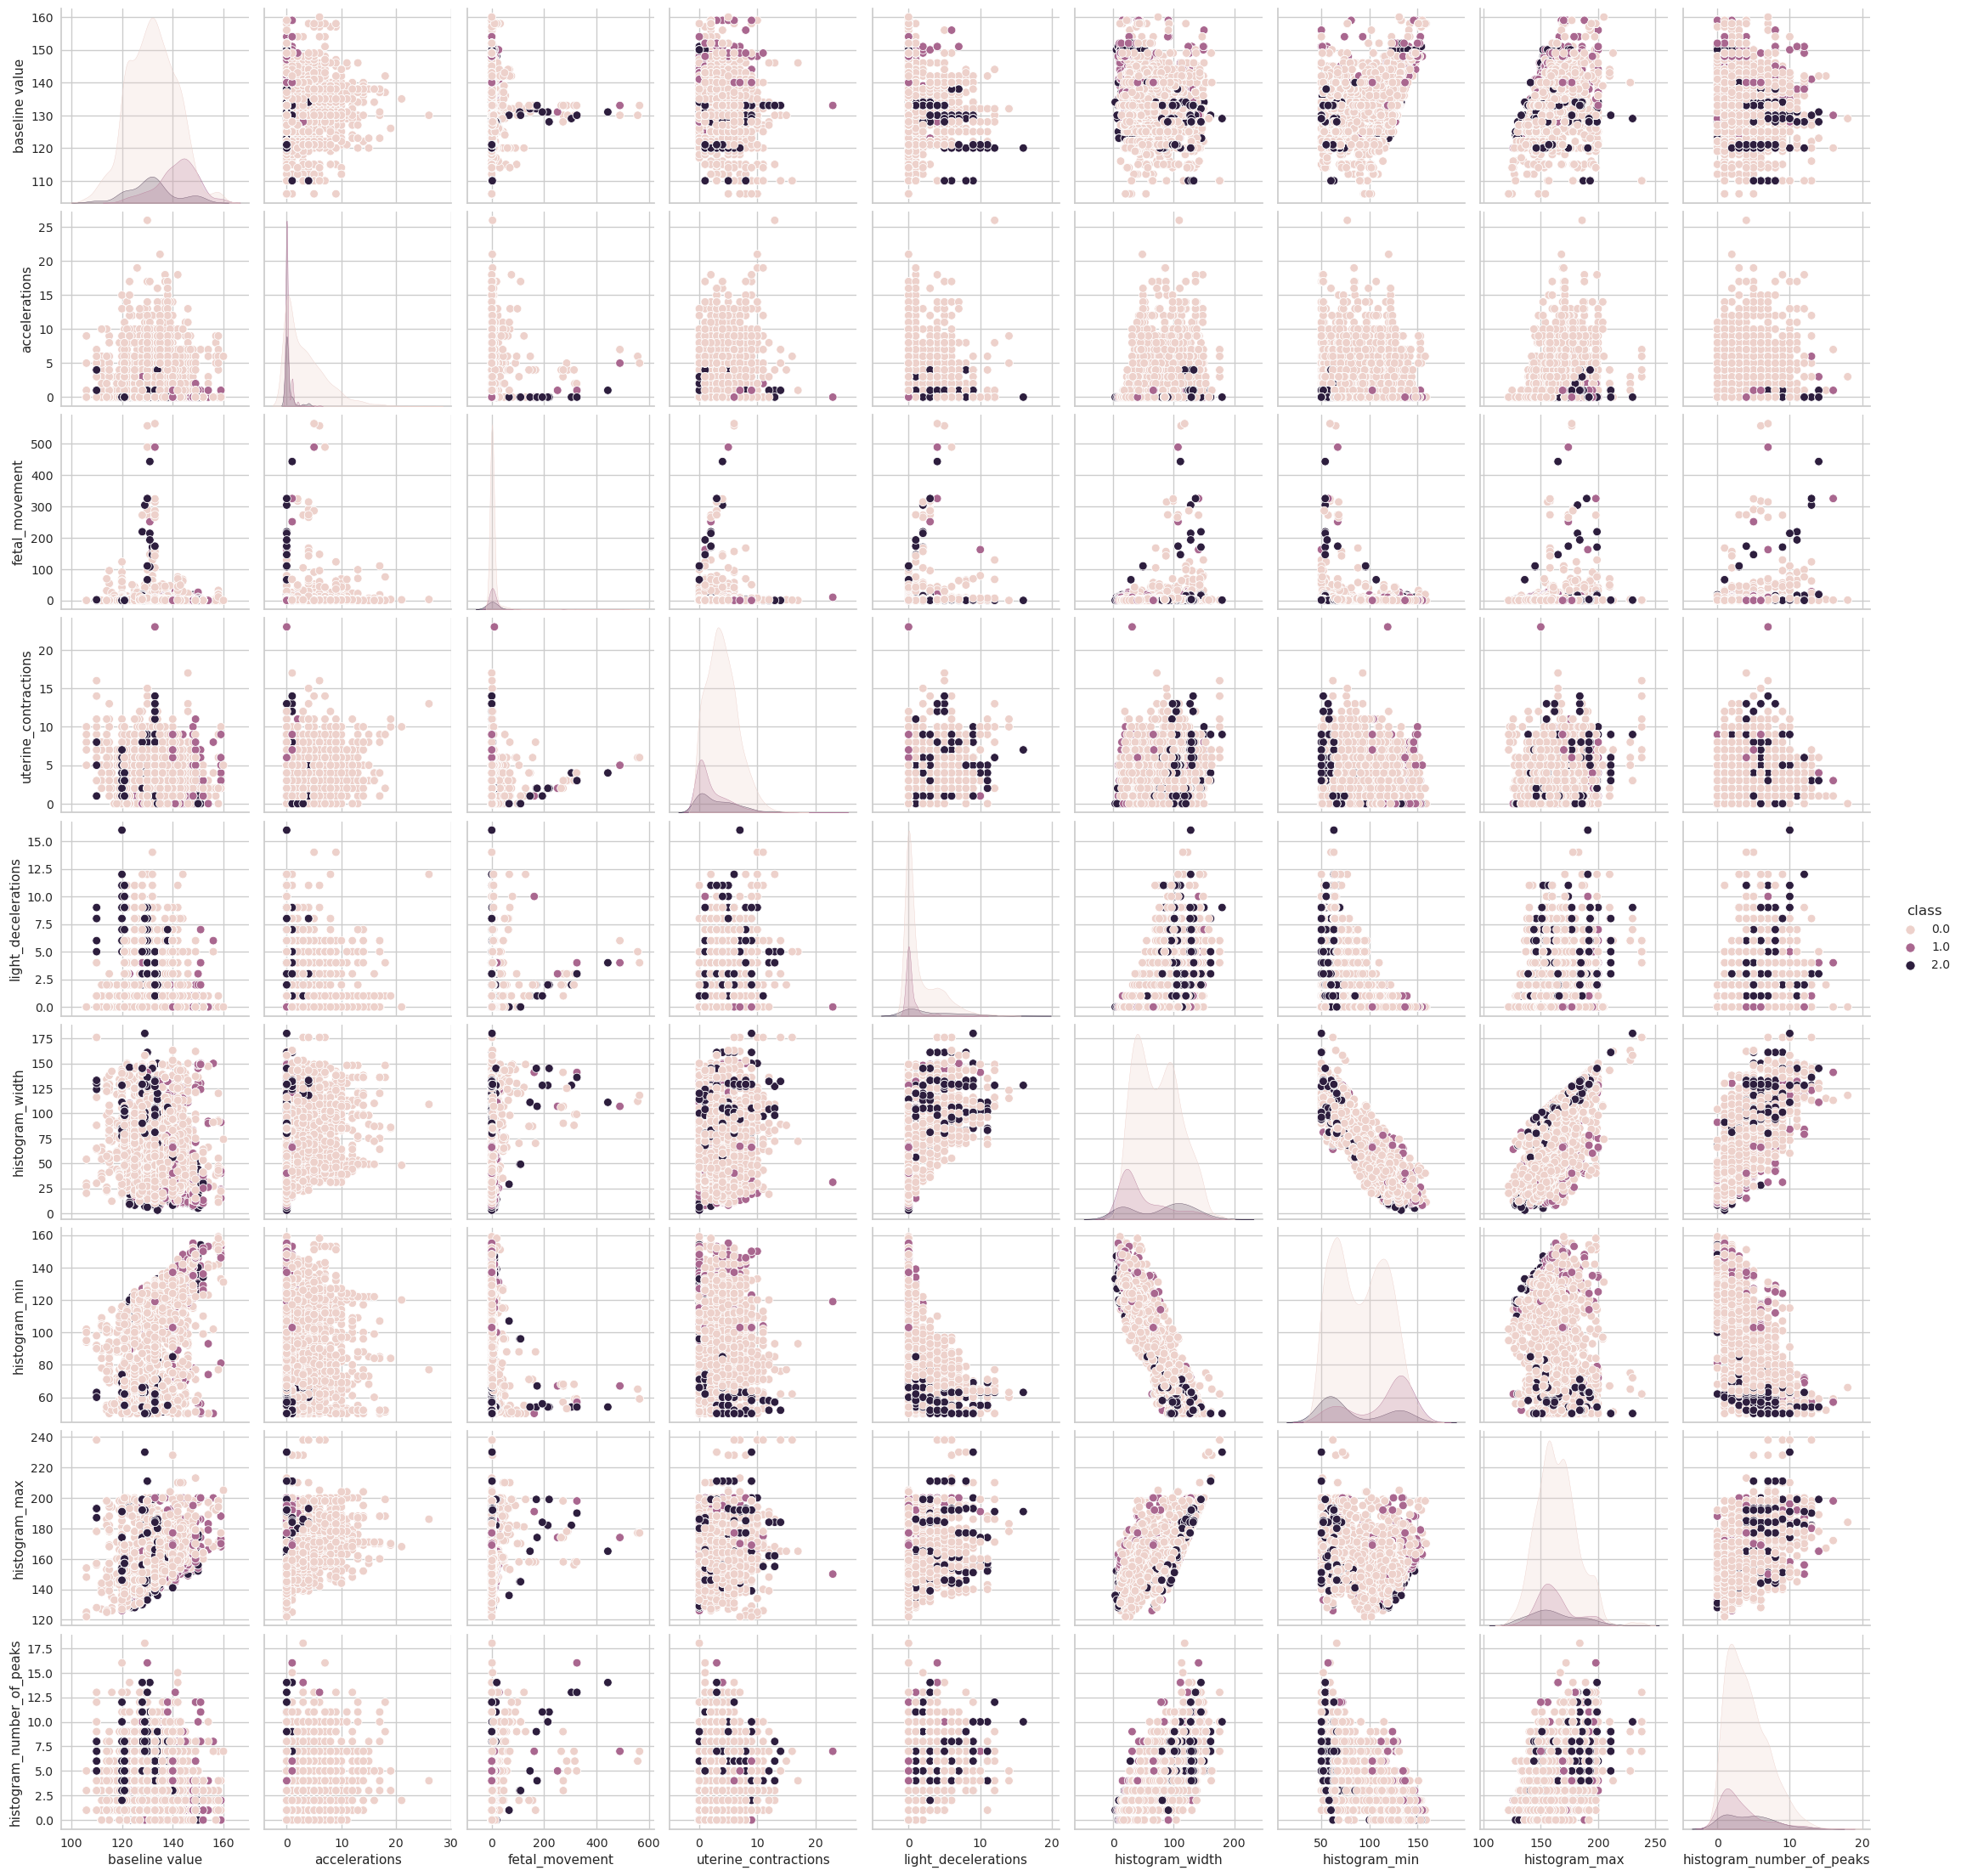

In [148]:
sns.pairplot(hearth_data_numerical, hue='class')

<AxesSubplot:xlabel='baseline value', ylabel='histogram_min'>

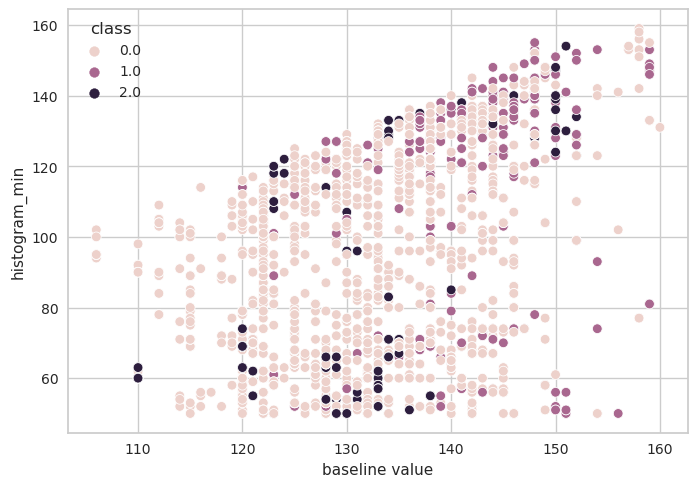

In [149]:
columns_for_2d = ['baseline value', 'histogram_min']
columns_for_3d = ['baseline value', 'histogram_min', 'accelerations']

sns.scatterplot(data=hearth_data_numerical, x='baseline value', y='histogram_min', hue='class')

In [150]:
# export for evaluation
hearth_data_numerical.to_csv('./data/heart-dataset/heart_numerical.csv', index=False)

## clustering

In [151]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_2d_cluster(X, model, columns = ['X', 'Y']):
    means = model.cluster_centers_ if 'cluster_centers_' in dir(model) else model.labels_
    ax = sns.scatterplot(X[columns[0]], X[columns[1]], c=vectorizer(model.labels_))
    ax = sns.scatterplot(means[:, 0], means[:, 1], ec='red', legend=False, ax=ax)
    plt.show()

In [152]:
hearth_data_numerical_y = hearth_data_numerical['class']
hearth_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   baseline value             2126 non-null   float64
 1   accelerations              2126 non-null   float64
 2   fetal_movement             2126 non-null   float64
 3   uterine_contractions       2126 non-null   float64
 4   light_decelerations        2126 non-null   float64
 5   histogram_width            2126 non-null   float64
 6   histogram_min              2126 non-null   float64
 7   histogram_max              2126 non-null   float64
 8   histogram_number_of_peaks  2126 non-null   float64
 9   class                      2126 non-null   float64
dtypes: float64(10)
memory usage: 182.7 KB


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff57ad0c10>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff57ad0c10>
Traceback 

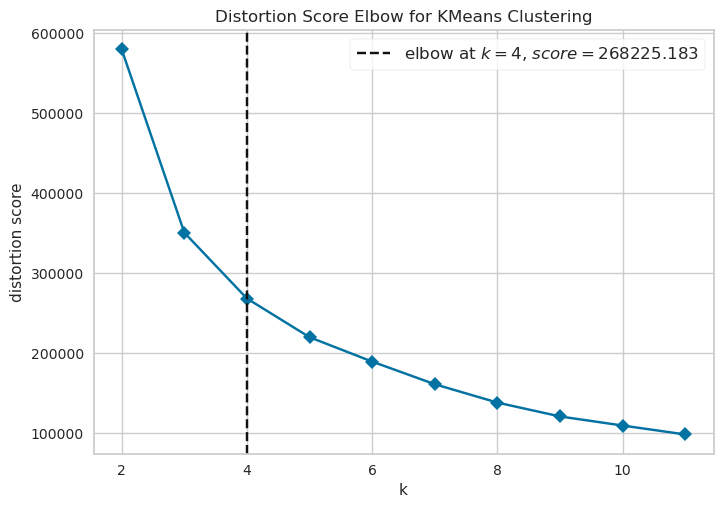

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [153]:
visualizer.fit(hearth_data_numerical[columns_for_2d])      # Fit the data to the visualizer
visualizer.show()

In [154]:
model = KMeans(n_clusters=visualizer.elbow_value_, init='random', algorithm='lloyd')
model.fit(hearth_data_numerical[columns_for_2d])
model.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff2bb72af0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff2bd65700>
Traceback 

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


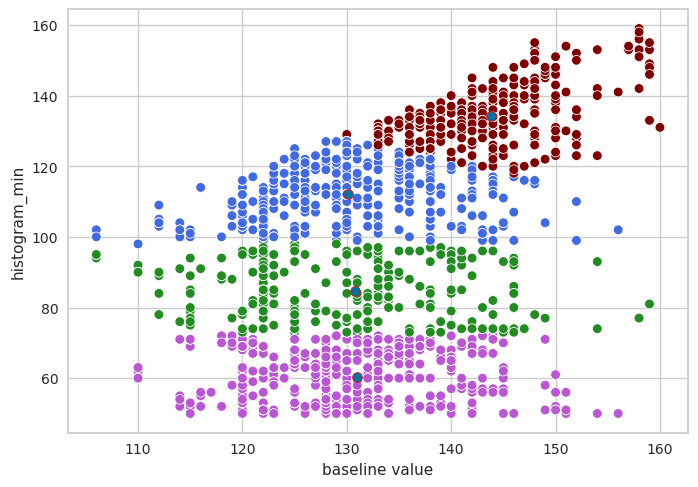

In [155]:
plot_2d_cluster(hearth_data_numerical, model, columns=columns_for_2d)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff2bd99f70>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff2bd99f70>
Traceback 

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(2, 12),
                 timings=False)

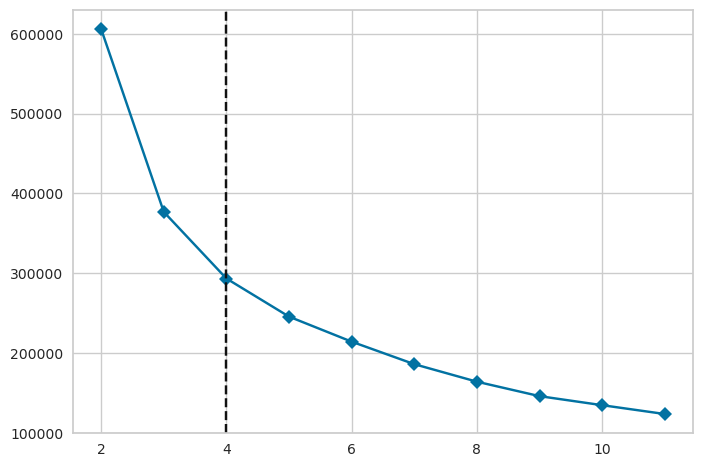

In [156]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
visualizer.fit(hearth_data_numerical[columns_for_3d])  

In [157]:
model = KMeans(n_clusters=visualizer.elbow_value_, init='random', algorithm='lloyd')
model.fit(hearth_data_numerical[columns_for_3d])
model.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff2bbb0ee0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff2bb975e0>
Traceback 

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [158]:
hearth_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   baseline value             2126 non-null   float64
 1   accelerations              2126 non-null   float64
 2   fetal_movement             2126 non-null   float64
 3   uterine_contractions       2126 non-null   float64
 4   light_decelerations        2126 non-null   float64
 5   histogram_width            2126 non-null   float64
 6   histogram_min              2126 non-null   float64
 7   histogram_max              2126 non-null   float64
 8   histogram_number_of_peaks  2126 non-null   float64
 9   class                      2126 non-null   float64
dtypes: float64(10)
memory usage: 182.7 KB


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff55cae160>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff55cae160>
Traceback 

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(2, 12),
                 timings=False)

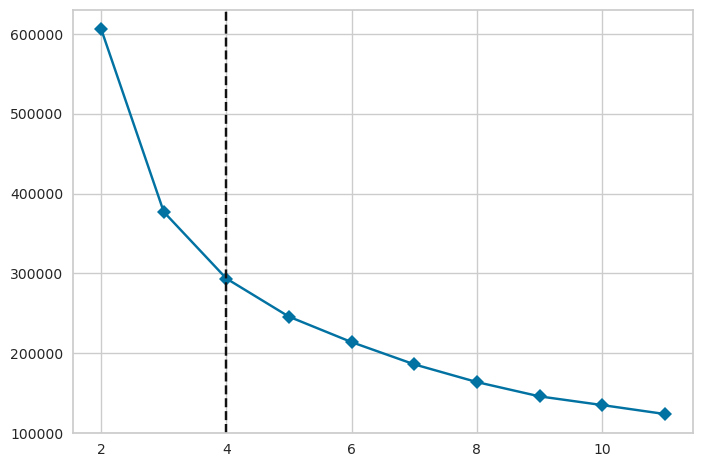

In [159]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
visualizer.fit(hearth_data_numerical[columns_for_3d])  

In [160]:
model = KMeans(n_clusters=visualizer.elbow_value_, init='random', algorithm='lloyd')
model.fit(hearth_data_numerical[columns_for_3d])
model.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff2bbef4c0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff2bbef4c0>
Traceback 

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

## DBSCAN

In [161]:
from Helpers import helpers

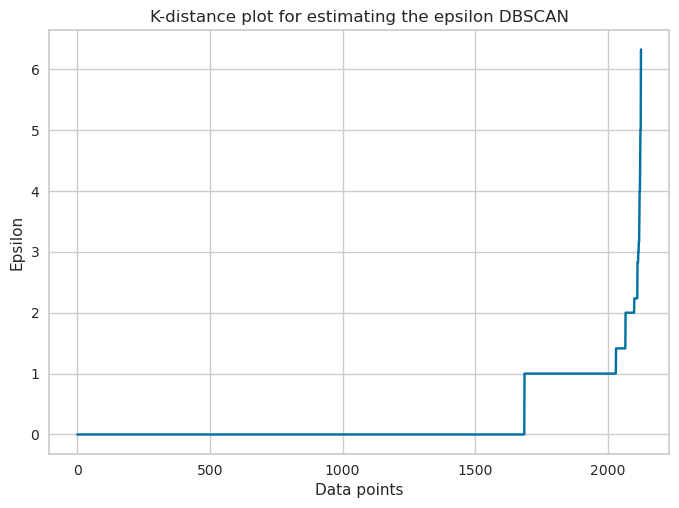

In [162]:
helpers.kDistancePlot(hearth_data_numerical[columns_for_2d])

In [163]:
eps = 2

In [164]:
from sklearn.cluster import DBSCAN


model = DBSCAN(eps=eps, min_samples=4, metric='euclidean')
model.fit(hearth_data_numerical[columns_for_2d])

DBSCAN(eps=2, min_samples=4)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

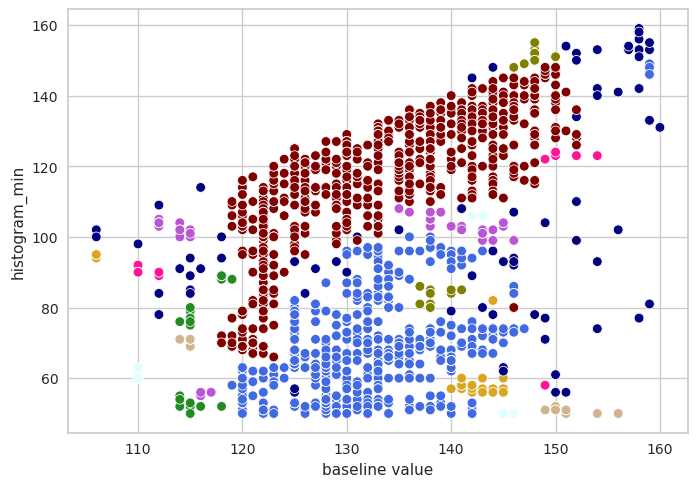

In [165]:
plot_2d_cluster(hearth_data_numerical, model, columns=columns_for_3d)

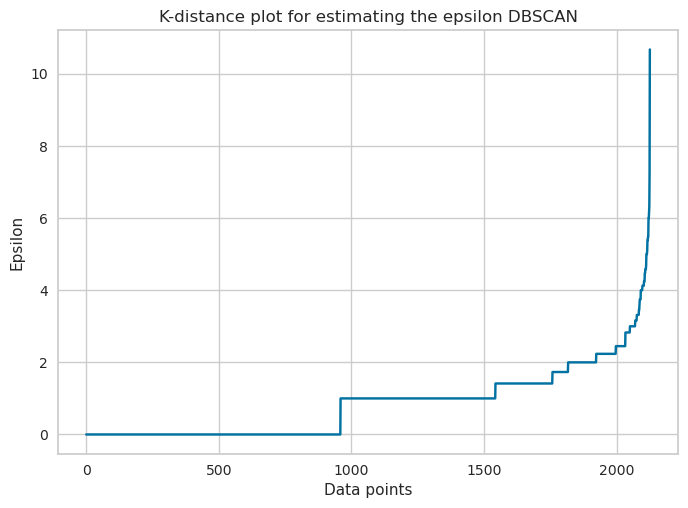

In [ ]:
helpers.kDistancePlot(hearth_data_numerical[columns_for_3d])

In [ ]:
eps = 3

model = DBSCAN(eps=eps, min_samples=6, metric='euclidean')
model.fit(hearth_data_numerical[columns_for_3d])

DBSCAN(eps=3, min_samples=6)

In [ ]:
model.labels_

array([0, 0, 0, ..., 1, 1, 1])

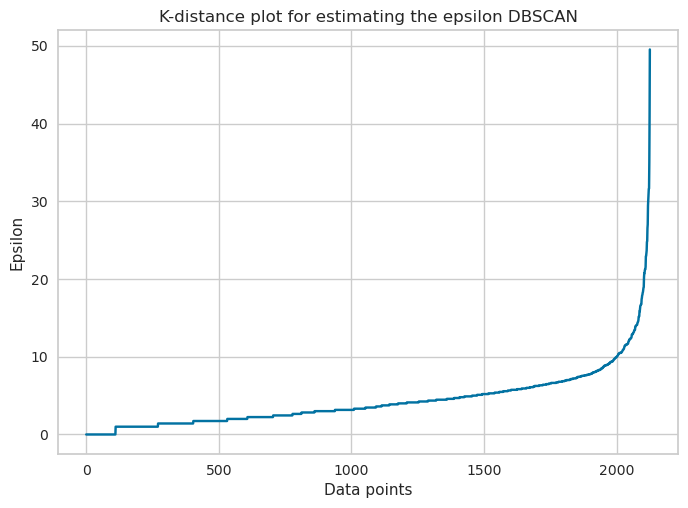

In [ ]:
helpers.kDistancePlot(hearth_data_numerical)

In [ ]:
len(hearth_data_numerical.columns)

10

## Affinity propagation

In [ ]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(damping=0.5, affinity='euclidean')
ap.fit(seeds_dataset_scaled[columns_for_evaluation_2d])

AffinityPropagation()

Parameters:
- affinity propagation: damping=0.5, affinity='euclidean'
- k-means: n_clusters=4, init='random' algorithm: lloyd (both 2d and 3d and nD)
- dbscan: eps=2, min_samples=6, metric='euclidean' for 3d
- dbscan2d: eps=3, min_samples=4, metric='euclidean' for 2d
- dbscanND: eps=10, min_samples= (10 features * 2)

We decided to cut affinity propagtion as the time it takes for 15 minutes is to long (and it still did not converge).

In [ ]:
adult_dataset = adult_dataset.convert_dtypes()
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  Int64 
 1   workclass       32561 non-null  string
 2   fnlwgt          32561 non-null  Int64 
 3   education       32561 non-null  string
 4   education-num   32561 non-null  Int64 
 5   marital-status  32561 non-null  string
 6   occupation      32561 non-null  string
 7   relationship    32561 non-null  string
 8   race            32561 non-null  string
 9   sex             32561 non-null  string
 10  capital-gain    32561 non-null  Int64 
 11  capital-loss    32561 non-null  Int64 
 12  hours-per-week  32561 non-null  Int64 
 13  native-country  32561 non-null  string
 14  income          32561 non-null  string
 15  class           32561 non-null  Int64 
dtypes: Int64(7), string(9)
memory usage: 4.2 MB


In [ ]:
adult_dataset['class'] = adult_dataset['income']
adult_dataset['class'].value_counts()

<=50K    24720
>50K      7841
Name: class, dtype: Int64

In [ ]:
adult_for_export = adult_dataset_numeric[columns_for_evaluation]
adult_for_export['class'] = adult_dataset['class']
adult_for_export_2d = adult_for_export.drop(columns=['capital-gain'])

/tmp/ipykernel_80728/1834067103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_for_export['class'] = adult_dataset['class']


In [ ]:
adult_for_export.head()

age  fnlwgt  capital-gain   class
0   39   77516          2174   <=50K
1   50   83311             0   <=50K
2   38  215646             0   <=50K
3   53  234721             0   <=50K
4   28  338409             0   <=50K

In [ ]:
adult_for_export_2d.head()

age  fnlwgt   class
0   39   77516   <=50K
1   50   83311   <=50K
2   38  215646   <=50K
3   53  234721   <=50K
4   28  338409   <=50K

In [ ]:
adult_for_export_2d.to_csv('./data/adult-dataset/adult_for_export_2d.csv', index=False)
adult_for_export.to_csv('./data/adult-dataset/adult_for_export_3d.csv', index=False)